In [2]:
!chcp 65001

Active code page: 65001


Sampling Frequency: 16000 [Hz]
Sample Size: 2 [Byte]
Number of Channels: 1
Number of Samples: 51040


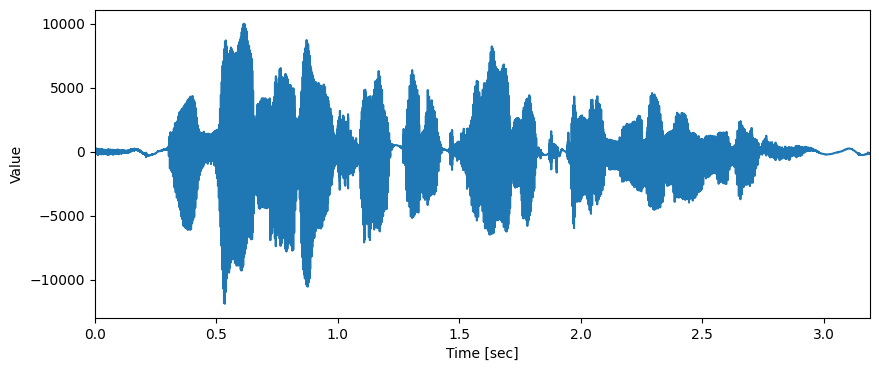

In [2]:
# -*- coding: utf-8 -*-

# wav 데이터를 읽기 위한 모듈(wave)를 import한다.
import wave

# 수치 연산용 모듈(numpy)을 import한다.
import numpy as np

# plot용 모듈(matplotlib)을 import 한다
import matplotlib.pyplot as plt

if __name__ == "__main__":
    # wav 파일 열기
    wav_file = '../../data/wav/BASIC5000_0001.wav'

    # 파형을 출력하는 파일(png 파일)
    out_plot = './plot.png'

    # wav 파일을 열고 이후 처리를 진행한다.
    with wave.open(wav_file) as wav:
        # 샘플링 주파수 [Hz] 확인
        sampling_frequency = wav.getframerate()

        # 샘플 사이즈 [Byte] 확인
        sample_size = wav.getsampwidth()

        # 채널 수 확인
        num_channels = wav.getnchannels()

        # wav 데이터 샘플 수 확인
        num_samples = wav.getnframes()

        # wav 데이터 읽기
        waveform = wav.readframes(num_samples)

        # 읽어들인 데이터는 바이너리 값(16bit integer)
        # 이므로 수치(정수)로 변환한다
        waveform = np.frombuffer(waveform, dtype=np.int16)

    # 읽어온 wav 파일의 정보 표시하기
    print("Sampling Frequency: %d [Hz]" % sampling_frequency)
    print("Sample Size: %d [Byte]" % sample_size)
    print("Number of Channels: %d" % num_channels)
    print("Number of Samples: %d" % num_samples)

    # 횡축(시간축) 생성하기
    time_axis = np.arange(num_samples) / sampling_frequency

    # 시각화 영역 생성
    plt.figure(figsize=(10,4))

    # 파형 그리기
    plt.plot(time_axis, waveform)

    # 횡축과 종축 라벨값 정의
    plt.xlabel("Time [sec]")
    plt.ylabel("Value")

    # 횡축 표시영역을 0에서 파형 종료 시각으로 제한
    plt.xlim([0, num_samples / sampling_frequency])

    # Plot 저장하기
    # plt.savefig(out_plot)